In [21]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()  # noqa
from sklearn.feature_extraction.text import CountVectorizer
from python.cogtext.datasets.pubmed import PubMedDataLoader

In [47]:
# load weights, clusters and metadata (takes <20sec)

clusters = pd.read_csv('models/cogtext/abstracts_clusters.csv.gz', index_col=0)
weights = np.load('models/cogtext/abstracts_weights.npz')['arr_0']
clusters['weights'] = list(weights)

pubmed = PubMedDataLoader(preprocessed=False, drop_low_occurred_labels=True).load()
pubmed = pubmed.merge(clusters, on='pmid', how='left')

/usr/local/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


<AxesSubplot:xlabel='label', ylabel='label'>

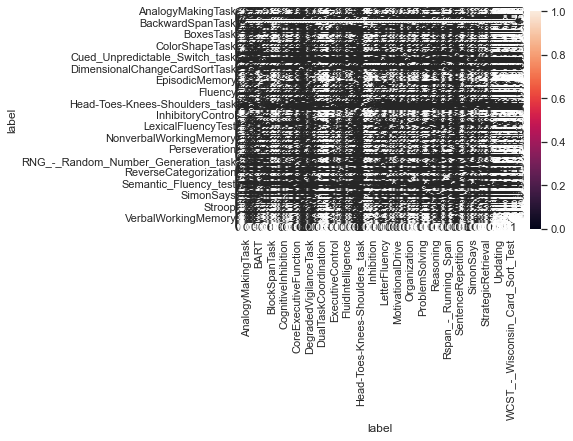

In [65]:
label_embeddings = pubmed.groupby('label')['weights'].apply(np.mean)
label_embeddings = pd.DataFrame(np.stack(label_embeddings), index=label_embeddings.index)

from scipy.spatial.distance import cosine

labels_corr = label_embeddings.T.corr(cosine)

sns.heatmap(labels_corr, annot=True)

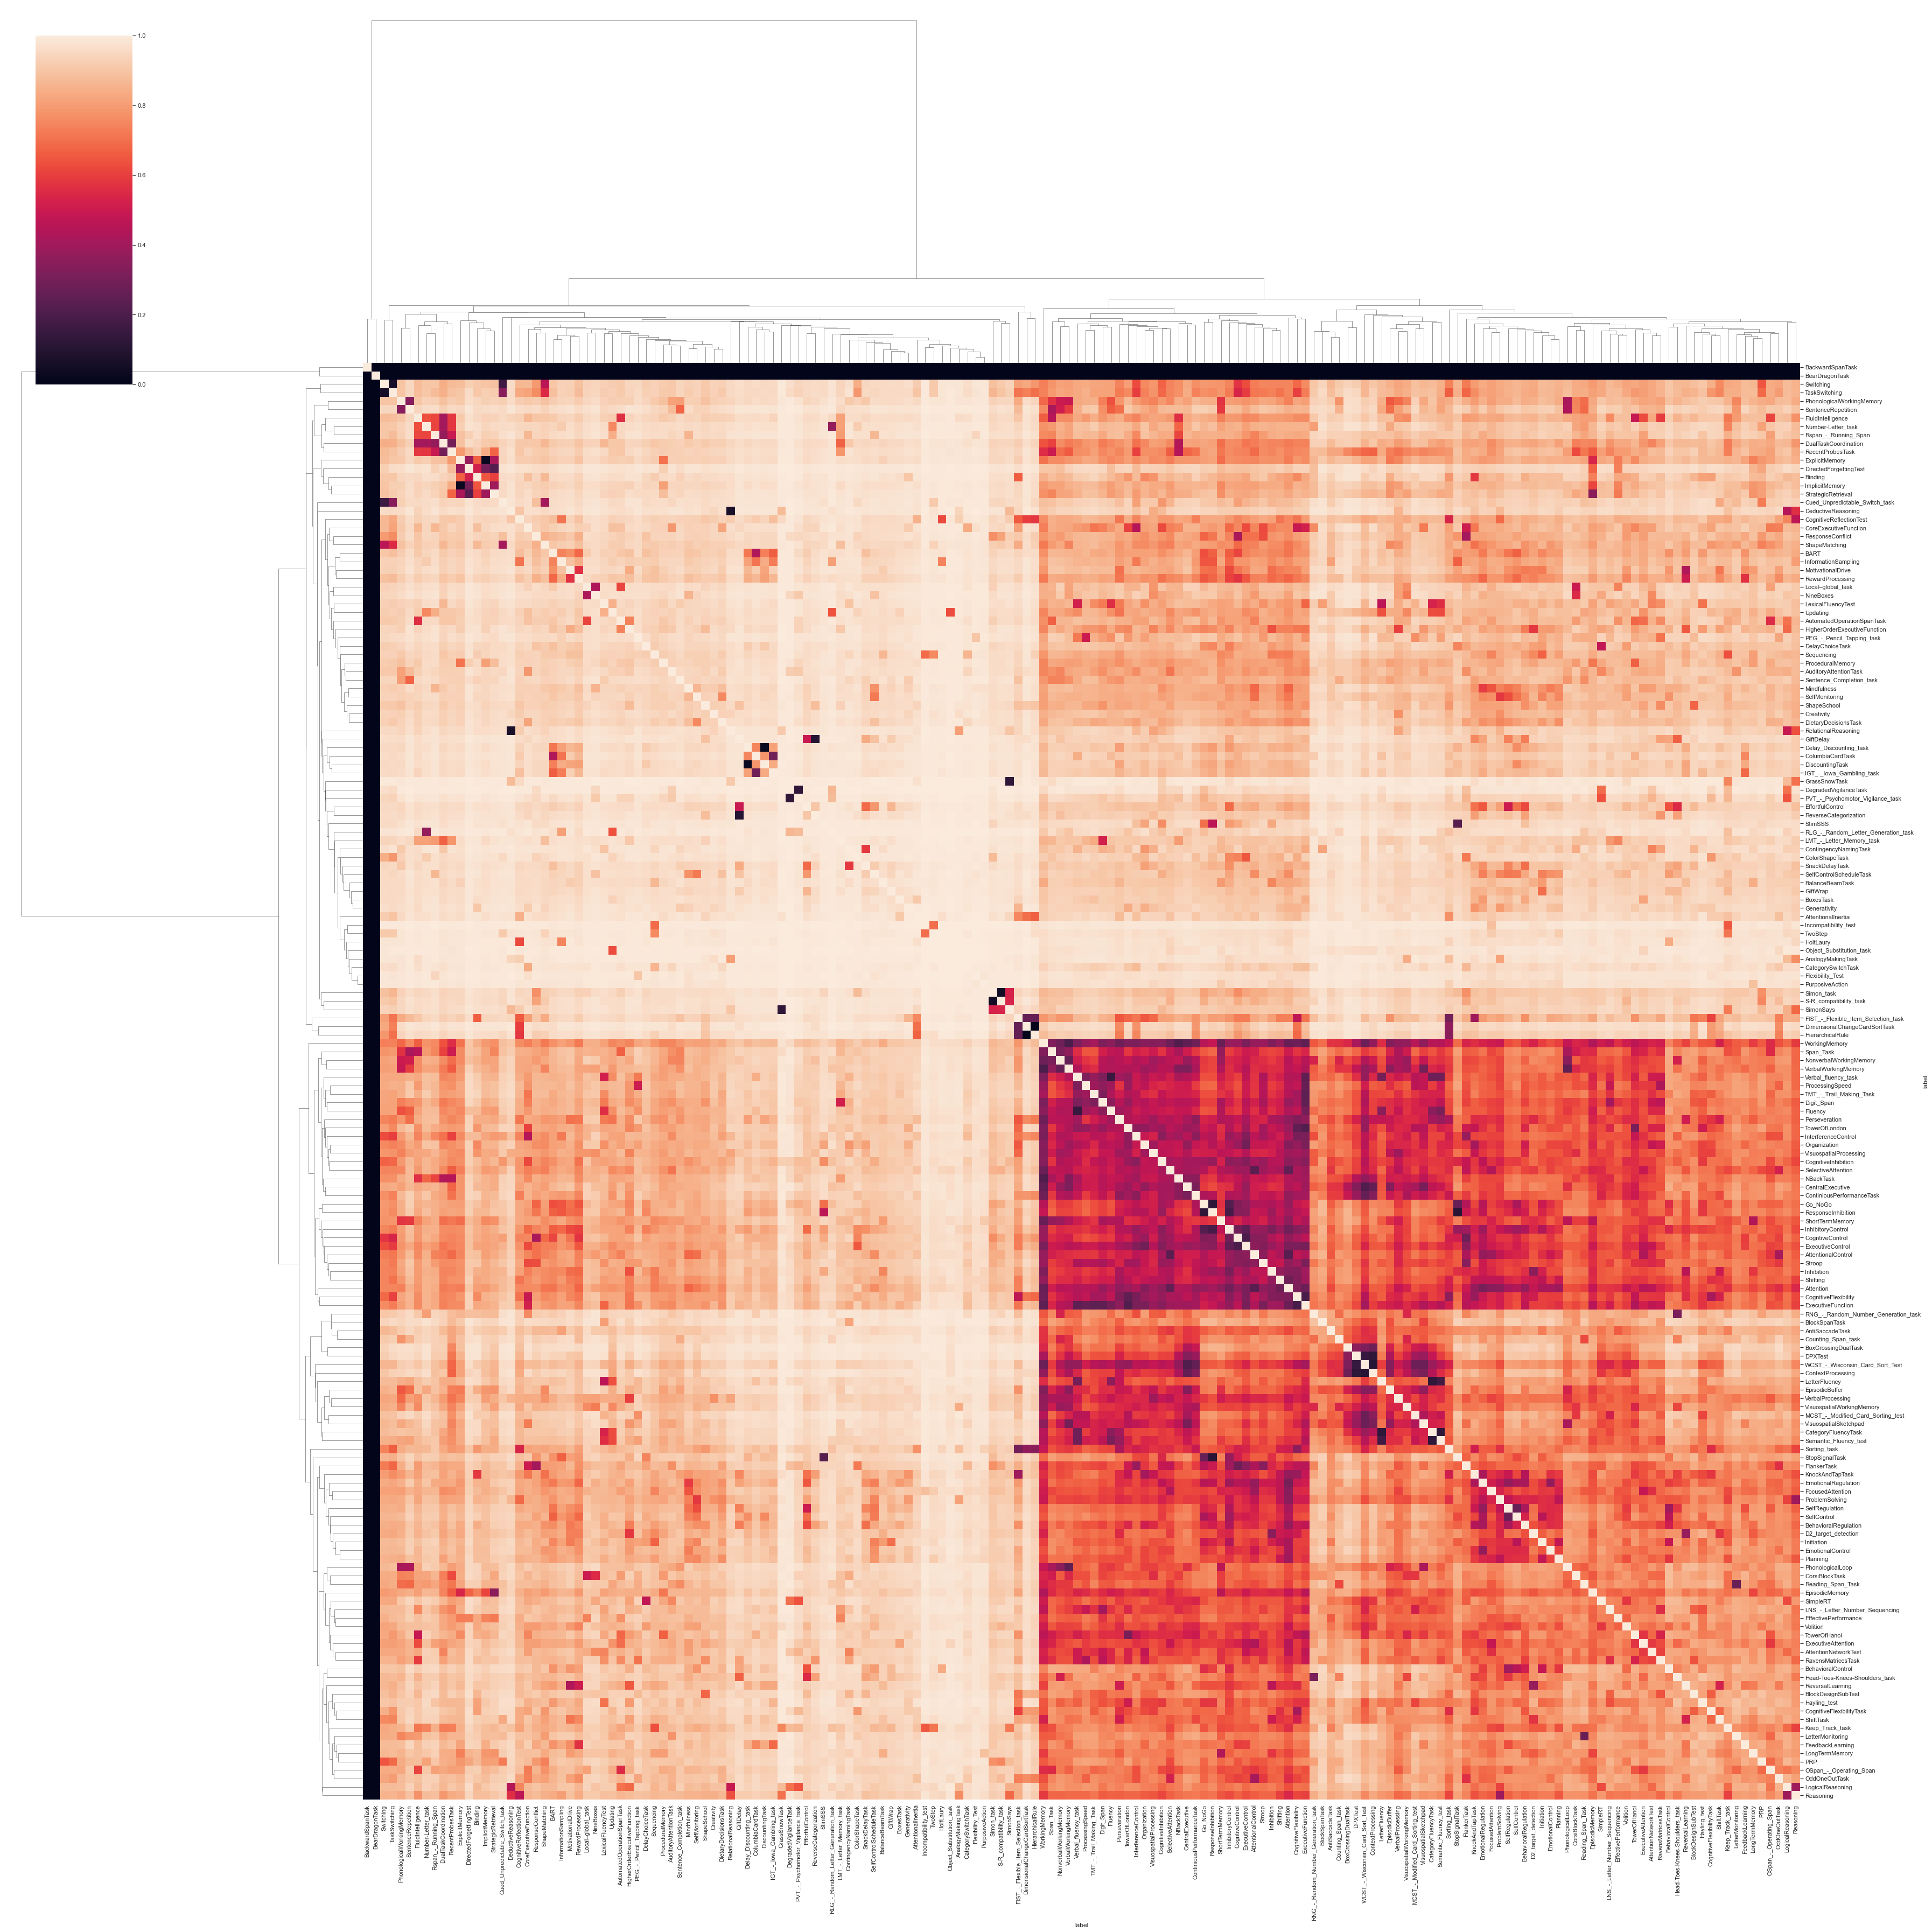

In [71]:
sns.clustermap(labels_corr, figsize=(50, 50))

In [ ]:

# fig, ax = plt.subplots(1,1, figsize=(10,10))

# # projected_scores = PCA(n_components=2, random_state=0).fit_transform(scores_df)
# projected_scores = UMAP(n_components=2, random_state=0).fit_transform(scores_df)
# projected_scores = pd.DataFrame(projected_scores, index=scores_df.index)

# sns.scatterplot(data=projected_scores, x=0, y=1, ax=ax, palette='Accent', s=200)

# for (lbl, x, y) in projected_scores.itertuples():
#   lbl = f'{lbl[:12]}...' if len(lbl)>10 else lbl
#   ax.text(x+0.01, y-np.random.random()*.01, f'{lbl}', alpha=0.5, fontsize=10)

# plt.suptitle('2-D projection of the topic embeddings.')
# plt.show()
# # pd.DataFrame(scores)

In [72]:
%reload_ext watermark
%watermark
%watermark -iv -p pytorch,tensorflow,python.cogtext,scikit-learn

Last updated: 2021-12-05T14:14:27.096068+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.28.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

pytorch       : not installed
tensorflow    : 2.7.0
python.cogtext: 0.1.2021120513
scikit-learn  : 0.0

numpy     : 1.20.3
pandas    : 1.3.4
sys       : 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:19) 
[Clang 11.1.0 ]
seaborn   : 0.11.2
matplotlib: 3.4.3
sklearn   : 0.0

